## Importar librerias

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

## Train Naive Bayes model using Scikit-Learn

In [2]:
df = pd.read_csv('data\website_classification.csv', na_filter=False)
df

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
...,...,...,...,...
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult


In [3]:
df1 = df.drop(df.columns[0], axis=1)
df1

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
...,...,...,...
1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult


In [4]:
df_train, df_test = train_test_split(df1, test_size=0.2, random_state=42)

In [5]:
df_train

,website_url,cleaned_website_text,Category
1335,https://www.swmintl.com/,swm product engineering manufacturing company ...,Business/Corporate
579,https://www.theworldwomennews.com/,news world women news world women news astrolo...,News
1137,http://rainbowmetals.com/,belt buckle stock custom memorial plaque belt ...,E-Commerce
48,https://islanddreamsworldtravel.com/,island dreams world travel world want featured...,Travel
155,https://www.primephonic.com,primephonic classical streaming stream service...,Streaming Services
...,...,...,...
1095,https://www.instacart.com/,instacart grocery delivery pickup local stores...,E-Commerce
1130,http://www.hotfingersgloves.com/,hotfingers home page products welcome featured...,E-Commerce
1294,http://www.jewelryshopkeeper.com/,jewelry shopkeeper complete jewelry store mana...,Business/Corporate
860,http://www.eliteskills.com/rp/,roleplay eliteskills roleplay move roleplay li...,Games


In [6]:
df_test

,website_url,cleaned_website_text,Category
353,https://www.321chat.com/,chat free chat room chat room free chat room c...,Social Networking and Messaging
864,http://www.loonygames.com/content/2.1/feat/,loonygame present american mcgee alice looking...,Games
1161,https://www.archiesonline.com/,archie gifts greetings shop online gifts greet...,E-Commerce
192,https://www.medici.tv/en/,world lead classical music channel rare exclus...,Streaming Services
782,http://www.boardgamegeek.com/game/5120,doubles wild board game boardgamegeek box roll...,Games
...,...,...,...
1000,http://link.springer.com/journal/11094,pharmaceutical chemistry journal home pharmace...,Education
610,https://www.canada.ca/en/security-intelligence...,canadian security intelligence service canadia...,Law and Government
188,https://azm.to,wait sec welcome azmovie azmovie good source w...,Streaming Services
289,https://www.qldcricket.com.au/,queensland cricket queensland cricket welcome ...,Sports


Text(0, 0.5, 'Número total de categorías individuales para entrenamiento')

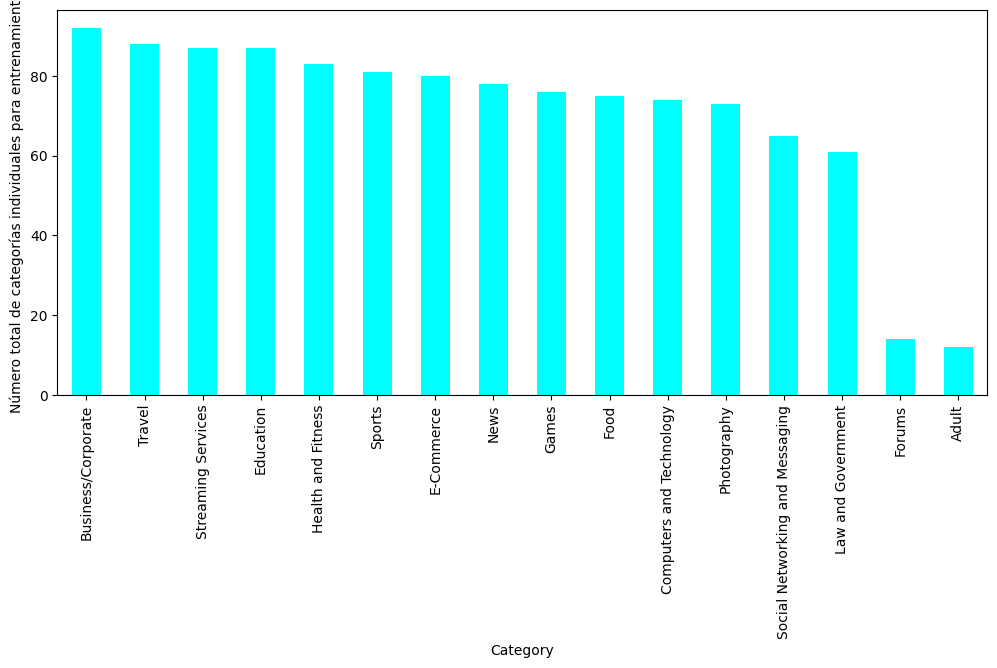

In [7]:
df_train.Category.value_counts().plot(figsize=(12,5), kind='bar', color='cyan')
plt.xlabel('Category')
plt.ylabel('Número total de categorías individuales para entrenamiento')

Text(0, 0.5, 'Número total de categorías individuales para validación')

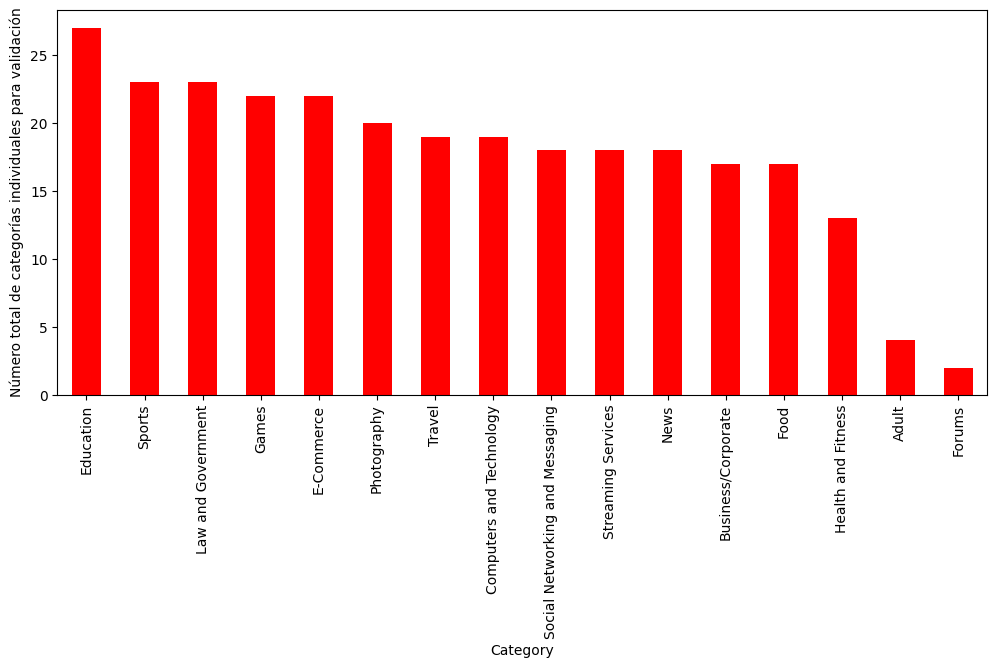

In [8]:
df_test.Category.value_counts().plot(figsize=(12,5), kind='bar', color='red');
plt.xlabel('Category')
plt.ylabel('Número total de categorías individuales para validación')

In [9]:
x_train = df_train['cleaned_website_text']
y_train = df_train['Category']

x_test = df_test['cleaned_website_text']
y_test = df_test['Category']

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1126,)
(1126,)
(282,)
(282,)


In [11]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(x_train, y_train)

In [12]:
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
model = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search, random_state=0)
model = model.fit(x_train, y_train)

In [13]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print('Train Accuracy: ', str(acc_train))
print('Test Accuracy: ', str(acc_test))

Train Accuracy:  1.0
Test Accuracy:  0.8971631205673759


In [14]:
print(classification_report(y_test, y_pred_test))

                                 precision    recall  f1-score   support

                          Adult       1.00      1.00      1.00         4
             Business/Corporate       0.68      0.88      0.77        17
       Computers and Technology       0.83      0.79      0.81        19
                     E-Commerce       0.91      0.91      0.91        22
                      Education       0.92      0.85      0.88        27
                           Food       0.94      0.94      0.94        17
                         Forums       0.00      0.00      0.00         2
                          Games       0.95      0.86      0.90        22
             Health and Fitness       1.00      1.00      1.00        13
             Law and Government       1.00      0.96      0.98        23
                           News       0.77      0.94      0.85        18
                    Photography       0.95      0.90      0.92        20
Social Networking and Messaging       0.93      0.

c:\Users\HardyGP\Desktop\proyectos\proyectofinal\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HardyGP\Desktop\proyectos\proyectofinal\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HardyGP\Desktop\proyectos\proyectofinal\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [15]:
labels = []
for i in df['Category']:
  if i not in labels:
    labels.append(i)
print(labels)

['Travel', 'Social Networking and Messaging', 'News', 'Streaming Services', 'Sports', 'Photography', 'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce', 'Forums', 'Food', 'Education', 'Computers and Technology', 'Business/Corporate', 'Adult']


<Axes: >

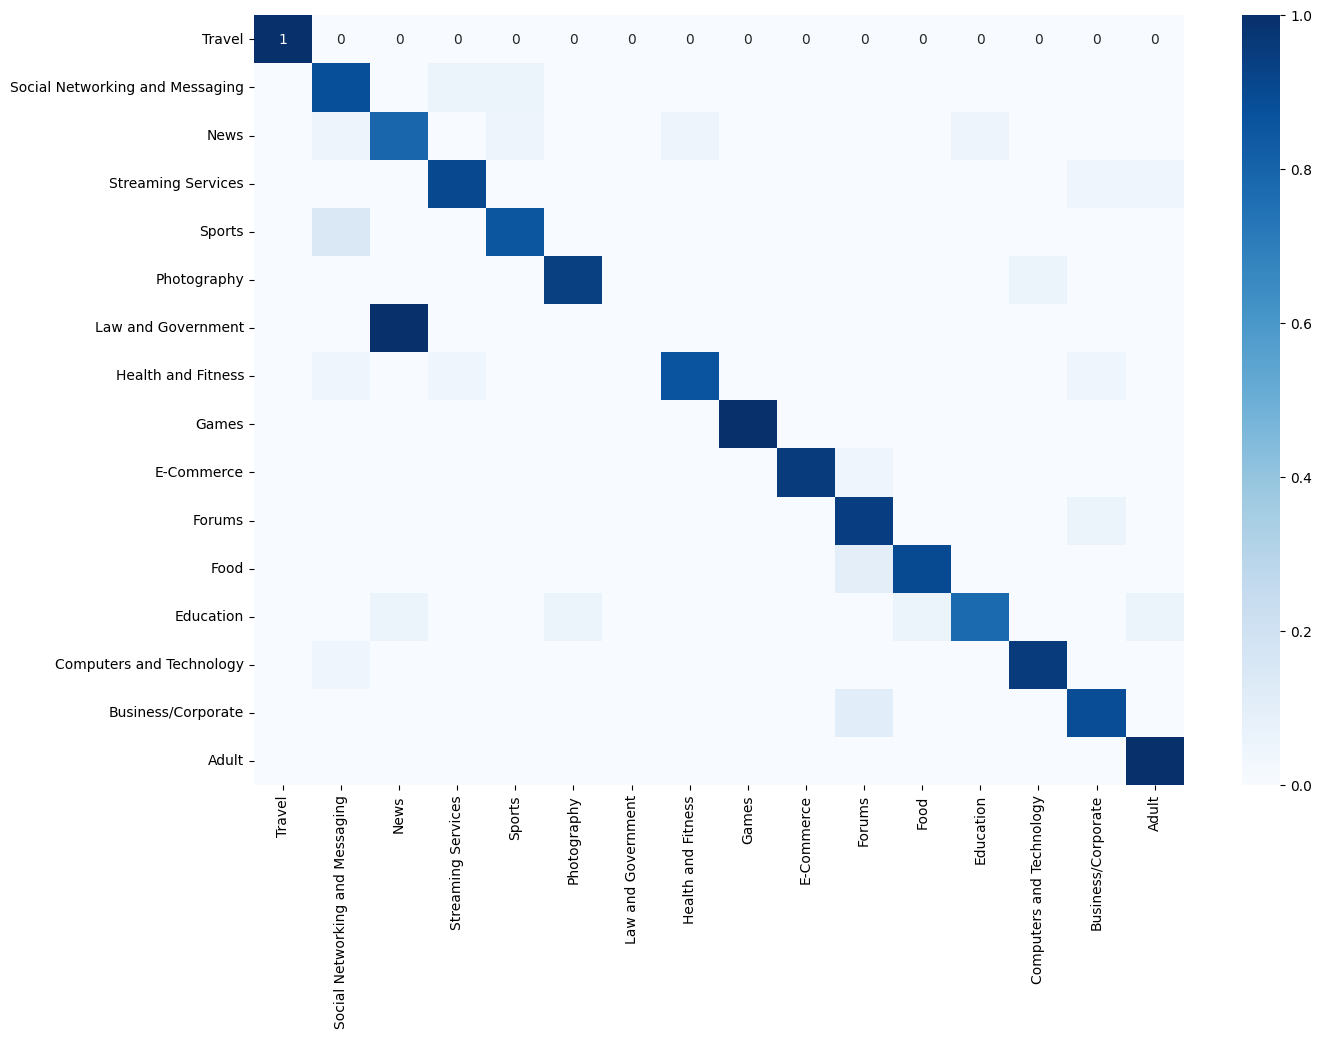

In [16]:
array = confusion_matrix(y_test, y_pred_test)
cm = np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in labels], columns = [i for i in labels])

plt.figure(figsize = (15,10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns.heatmap(df_cm, annot=True, cmap='Blues')

In [17]:
import joblib

# Supongamos que `nlp_model` es tu modelo de NLP entrenado
nlp_model = model

# Guardar el modelo en un archivo
joblib.dump(nlp_model, 'modelo_nlp.joblib')

['modelo_nlp.joblib']